In [13]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import numpy as np

In [14]:
os.chdir('/kaggle/input/')

In [15]:
dataset = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [16]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Removing the duplicates 

In [17]:
#removing duplicates from traainig dataset
dataset.duplicated().sum()

1081

## Dropping the Duplicates

In [18]:
dataset=dataset.drop_duplicates()

### Scaling the time and amount column, cause these column were not scaled

In [19]:
rob_scaler = RobustScaler()

dataset['Amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['Time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))


#### Creaing test,train

In [20]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [21]:
x_train, x_test, y_train,y_test = train_test_split(x,y , 
                          random_state=104,
                          train_size=0.8, shuffle=True)

#### Checking for correlation

In [22]:
x_train.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.116579,-0.010851,-0.422293,-0.105974,0.172622,-0.062061,0.086270,-0.036922,-0.007682,...,-0.051532,0.045857,0.144895,0.050720,-0.015759,-0.233585,-0.043368,-0.006433,-0.009942,-0.009917
V1,0.116579,1.000000,0.018770,-0.002975,-0.004038,-0.007531,0.003692,-0.013051,-0.007238,-0.000004,...,0.020486,0.003033,-0.000487,-0.003089,-0.001056,-0.003378,-0.001732,-0.019191,-0.006638,-0.229208
V2,-0.010851,0.018770,1.000000,0.010415,-0.006468,0.004993,-0.002664,0.008370,0.013193,-0.003258,...,0.014818,0.008578,-0.002394,-0.011006,0.000238,-0.003599,-0.001513,-0.000219,-0.006735,-0.531018
V3,-0.422293,-0.002975,0.010415,1.000000,0.002867,-0.004924,-0.001665,-0.017847,-0.009980,-0.004481,...,0.007358,-0.000797,0.000420,-0.000085,0.000474,-0.002501,-0.000156,-0.008587,0.004131,-0.214127
V4,-0.105974,-0.004038,-0.006468,0.002867,1.000000,0.003331,-0.001730,0.006373,0.001885,0.005165,...,-0.005304,-0.004680,0.000538,0.001957,-0.000547,0.001400,0.002005,0.005717,0.001826,0.099697
V5,0.172622,-0.007531,0.004993,-0.004924,0.003331,1.000000,-0.004332,-0.018535,-0.001927,-0.001307,...,-0.002558,-0.004471,0.001059,-0.004333,-0.000314,-0.002149,0.001163,-0.009155,0.009771,-0.392979
V6,-0.062061,0.003692,-0.002664,-0.001665,-0.001730,-0.004332,1.000000,0.008728,0.006659,-0.000617,...,-0.000464,0.005112,-0.001008,0.002931,0.001777,0.001941,0.001189,0.003250,-0.003604,0.221883
V7,0.086270,-0.013051,0.008370,-0.017847,0.006373,-0.018535,0.008728,1.000000,-0.027703,-0.010497,...,0.003515,-0.002974,0.003798,0.017222,-0.001170,0.002638,0.001442,-0.002122,-0.002983,0.409025
V8,-0.036922,-0.007238,0.013193,-0.009980,0.001885,-0.001927,0.006659,-0.027703,1.000000,-0.004511,...,0.016640,-0.004231,0.002002,0.007871,0.000707,-0.002678,-0.001319,-0.013114,-0.000491,-0.109087
V9,-0.007682,-0.000004,-0.003258,-0.004481,0.005165,-0.001307,-0.000617,-0.010497,-0.004511,1.000000,...,-0.005259,-0.001783,0.002876,0.001057,0.000266,-0.001283,0.000181,0.006988,0.009347,-0.044463


<AxesSubplot:>

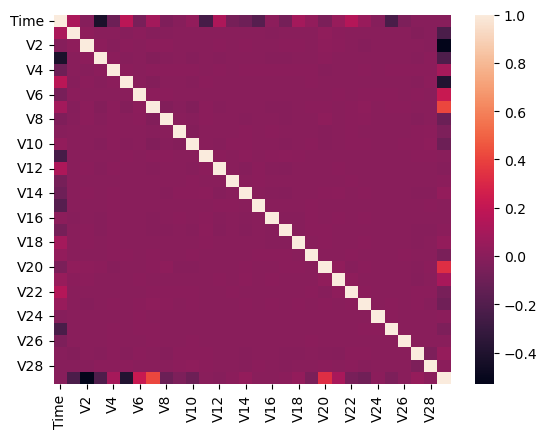

In [23]:
sns.heatmap(x_train.corr())

#### Checking the distribution of the dataset using the kurtosis

In [24]:
a=pd.DataFrame(columns =['name','value'])


In [25]:
from scipy.stats import kurtosis

for i in x_train.columns:
    b=kurtosis(x_train[i],fisher=0)
    #print(i,kurtosis(x_train[i],fisher=0))
    a = a.append({'name': i,'value':b}, ignore_index=True) 

In [52]:
# Dataframe with the name of the column and its kurtosis value
a

,name,value
0,Time,1.706439
1,V1,37.098443
2,V2,98.771300
3,V3,29.231599
4,V4,5.636235
5,V5,248.576341
6,V6,53.344432
7,V7,488.901668
8,V8,160.209584
9,V9,6.241754


#### Checking the column with kurtosis value greater than 10

In [27]:
c=a['name'].where(a['value']>10)
c=c.dropna()
c=pd.DataFrame(c)

In [53]:
# DataFrame with the kurtosis value greater then 10
c

,name
1,V1
2,V2
3,V3
5,V5
7,V7
8,V8
12,V12
14,V14
16,V16
17,V17


### Tranforming the column using method 'yeo-johnson'

In [29]:
from sklearn.preprocessing import power_transform
for  i in c.loc[:,'name']: 
    x_train[[i]]= (power_transform(x_train[[i]],method = 'yeo-johnson'))

In [30]:
d=pd.DataFrame(columns =['name','value'])

In [31]:
for i in x_train.columns:
    b=kurtosis(x_train[i],fisher=0)
    #print(i,kurtosis(x_train[i],fisher=0))
    d = d.append({'name': i,'value':b}, ignore_index=True) 

#### Checking the kurtosis value of transformed dataset

In [32]:
d

,name,value
0,Time,1.706439
1,V1,3.010555
2,V2,31.665219
3,V3,4.548058
4,V4,5.636235
5,V5,173.197568
6,V6,72.039132
7,V7,395.398720
8,V8,122.482020
9,V9,6.241754


,name,value
0,Time,1.706439
1,V1,37.098443
2,V2,98.771300
3,V3,29.231599
4,V4,5.636235
5,V5,248.576341
6,V6,53.344432
7,V7,488.901668
8,V8,160.209584
9,V9,6.241754


#### Column whose kurtosis value increased because of tranformation

In [34]:
col=[]
for i in range(len(a)):
    if d.loc[i,'value']>a.loc[i,'value']:
        col.append(d.loc[i,'name'])

In [35]:
col

['V6', 'V10', 'V21', 'V27']

In [37]:
c=c.drop(c.index[[4,7,13,15]])


In [38]:
c

,name
1,V1
2,V2
3,V3
5,V5
7,V7
8,V8
12,V12
14,V14
16,V16
17,V17


#### Tranforming the dataset again

In [39]:
for  i in c.loc[:,'name']: 
    x_train[[i]]= (power_transform(x_train[[i]],method = 'yeo-johnson'))

#### tranformation of data is done

### Applying XGBoost


In [40]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 99.96%


In [41]:
def confusio_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(15,10))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Matrice de confusion')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
  
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

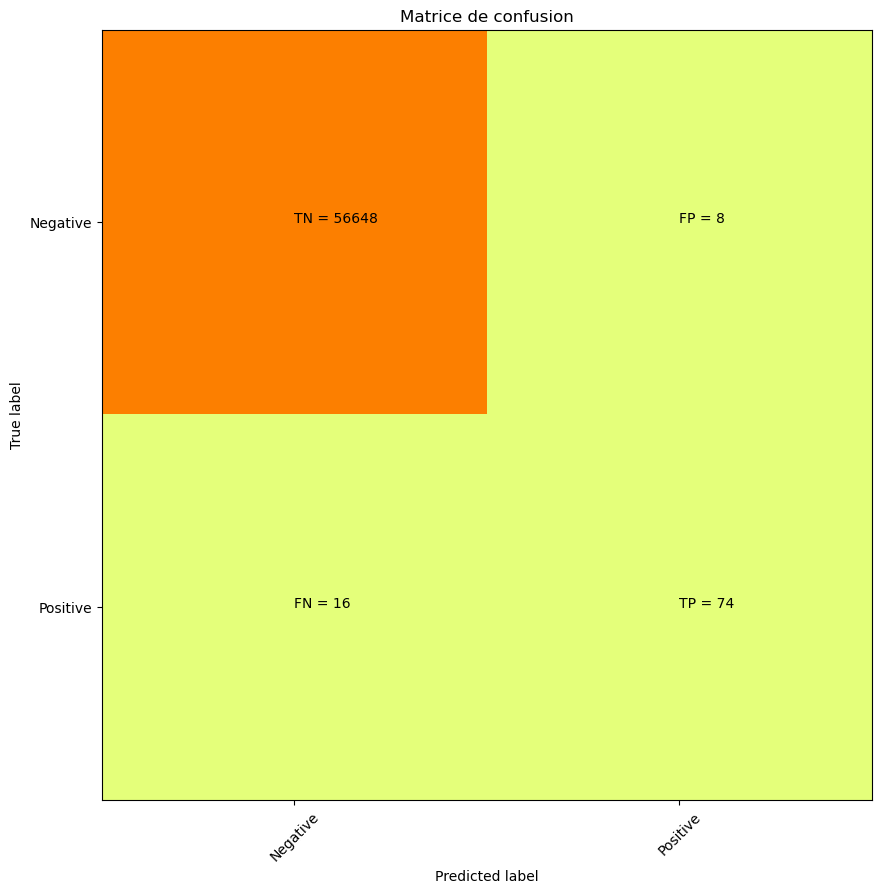

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
confusio_matrix(y_test,y_pred)

In [43]:
from sklearn import metrics

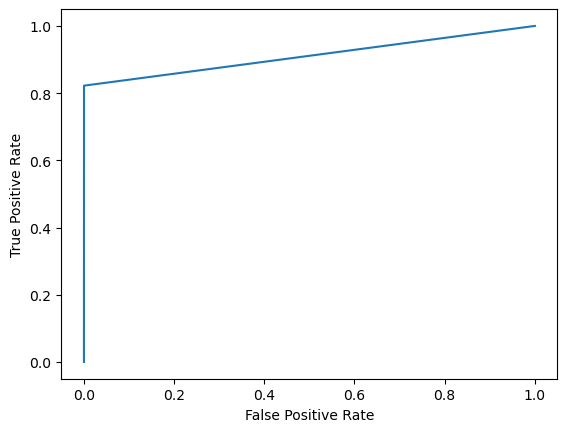

In [44]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.9110405095861182

In [46]:
y_test

8423      0
259696    0
270711    0
7319      0
51070     0
         ..
9482      0
54405     0
135147    0
135458    0
250646    0
Name: Class, Length: 56746, dtype: int64

In [47]:
data_to_submit = pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred
})

In [51]:
os.chdir('/kaggle/working/')
data_to_submit.to_csv('csv_to_submit.csv', index = False)